In [19]:
import matplotlib.pyplot as plt
import numpy as np


## Read data and save in X and y


In [20]:
def read_libsvm_format(file_path):
    X, y = [], []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            y.append(float(parts[0]))  
            features = {}
            for item in parts[1:]:
                index, value = item.split(":")
                features[int(index)] = float(value)
            X.append(features)
    return X, y

X, y = read_libsvm_format('cpusmall_scale')


## Initialization

In [21]:
in_sample_error_lin = []   
in_sample_error_poly = []  
lin_sub_poly_error = [] 

N = 64     


In [22]:
X[0]

{1: -0.993496,
 2: -0.993043,
 3: -0.850291,
 4: -0.963479,
 5: -0.960727,
 6: -0.900596,
 7: -0.96642,
 8: -0.863996,
 9: -0.606175,
 10: -0.999291,
 11: 0.0811894,
 12: 0.651101}

## Transfrom data type

In [23]:
def convert_dtype(X):               
    X_arr = []
    for element in X:
        input_vector = np.zeros(12)
        for index, value in element.items():
            input_vector[index - 1] = value        
        X_arr.append(input_vector)
    return X_arr

## transform function $\Phi()$

We use this function to map the orignal data into a higher dimensional space, and save the augmented input vectors in `X_aug_arr`.
Which means that each of the element in `X_aug_arr` is a 37-dimensional vector (12 features + 1 constant + 12 squared features + 12 cubed features).

In [24]:
def Phi(X_arr):
    X_aug_arr = []
    for arr in X_arr:
        Phi_arr = np.concatenate((np.array([1]), arr, arr**2, arr**3))
        X_aug_arr.append(Phi_arr)
    return np.array(X_aug_arr)


## Generate random indices

In [25]:
def generate_random_sample(seed):
    np.random.seed(seed)
    random_sample_indices = np.random.choice(len(X), N, replace=False)

    return random_sample_indices

## get weight vector

Use the pseudo inverse to get the weight vector.

In [26]:
def weight_vector(X_in_sample_mat_lin, y_in_sample_array, X_in_sample_mat_poly):

    w_lin = np.linalg.pinv(X_in_sample_mat_lin) @ y_in_sample_array
    w_poly = np.linalg.pinv(X_in_sample_mat_poly) @ y_in_sample_array
    return w_lin , w_poly

## in sample error

In [27]:
def in_sample_error(X_sample_mat_lin, X_sample_mat_poly, y_sample_array, w_lin, w_poly):

    in_sample_error_lin = np.mean((X_sample_mat_lin @ w_lin - y_sample_array) ** 2)
    in_sample_error_poly = np.mean((X_sample_mat_poly @ w_poly - y_sample_array) ** 2)
    return in_sample_error_lin, in_sample_error_poly

## Main function

In [28]:
for experiment in range(1126):

    seed = experiment
    random_sample_indices = generate_random_sample(seed)
    X_sample = [X[i] for i in random_sample_indices]
    y_sample = [y[i] for i in random_sample_indices]

    X_sample_mat_lin = np.array(convert_dtype(X_sample))
    X_sample_mat_poly = Phi(convert_dtype(X_sample)) 

    y_sample_array = np.array(y_sample)

    w_lin, w_poly = weight_vector(X_sample_mat_lin, y_sample_array, X_sample_mat_poly)
    in_sample_error_lin, in_sample_error_poly = in_sample_error(X_sample_mat_lin, X_sample_mat_poly, y_sample_array, w_lin, w_poly)

    lin_sub_poly_error.append(in_sample_error_lin - in_sample_error_poly)
    avg_difference = np.mean(lin_sub_poly_error)




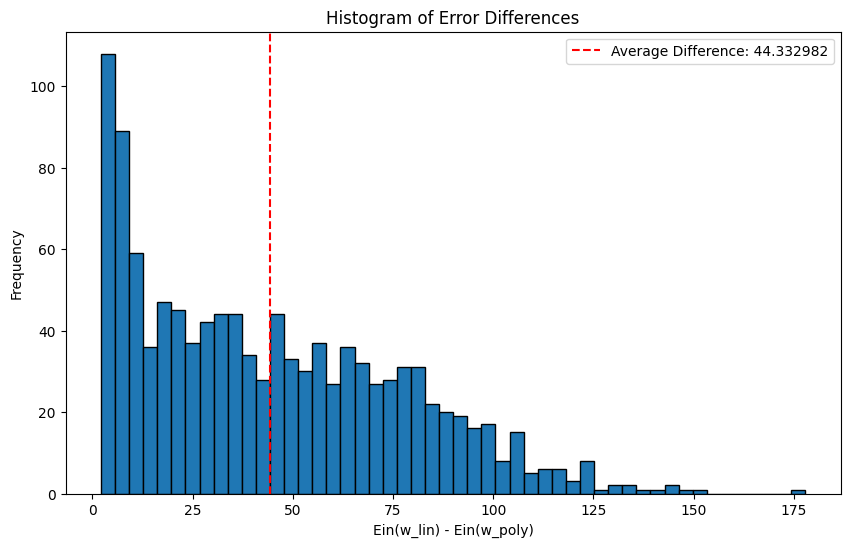

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(lin_sub_poly_error, bins=50, edgecolor='black')
plt.axvline(x=avg_difference, color='r', linestyle='--', 
            label=f'Average Difference: {avg_difference:.6f}')
plt.xlabel('Ein(w_lin) - Ein(w_poly)')
plt.ylabel('Frequency')
plt.title('Histogram of Error Differences')
plt.legend()
plt.show()

In [30]:
lin_sub_poly_error[:5]

[45.55657024660474,
 37.239331415175705,
 11.571512812774277,
 84.50266600124588,
 18.419134853696768]

In [31]:
# sort lin_sub_poly_error
lin_sub_poly_error.sort()
lin_sub_poly_error[:5]

[2.106684773011876,
 2.573689549750096,
 2.6182981546031963,
 2.650761027360537,
 2.667647590987482]

In [32]:
max(lin_sub_poly_error)

177.90726477893517

In [33]:
X_sample_mat_lin.shape

(64, 12)

In [34]:
X_sample_mat_poly.shape

(64, 37)